In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import roc_curve, roc_auc_score

C:\Users\user\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## Loading the data

In [2]:
loan_data_inputs_train = pd.read_csv(r'loan_data_inputs_train.csv', index_col = 0)
loan_data_targets_train = pd.read_csv(r'loan_data_targets_train.csv', index_col = 0, header = None)
loan_data_inputs_test = pd.read_csv(r'loan_data_inputs_test.csv', index_col = 0)
loan_data_targets_test = pd.read_csv(r'loan_data_targets_test.csv', index_col = 0, header = None)

In [3]:
loan_data_inputs_train.head()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,...,dti:21.7-22.4,dti:22.4-35,dti:>35,mths_since_last_record:Missing,mths_since_last_record:0-2,mths_since_last_record:3-20,mths_since_last_record:21-31,mths_since_last_record:32-80,mths_since_last_record:81-86,mths_since_last_record:>=86
427211,427211,12796369,14818505,24000,24000,24000.0,36 months,8.90,762.08,A,...,1,0,0,1,0,0,0,0,0,0
206088,206088,1439740,1691948,10000,10000,10000.0,36 months,14.33,343.39,C,...,0,0,0,1,0,0,0,0,0,0
136020,136020,5214749,6556909,20425,20425,20425.0,36 months,8.90,648.56,A,...,0,0,0,1,0,0,0,0,0,0
412305,412305,13827698,15890016,17200,17200,17200.0,36 months,16.59,609.73,D,...,0,0,0,1,0,0,0,0,0,0
36159,36159,422455,496525,8400,8400,7450.0,36 months,12.84,282.40,C,...,0,1,0,1,0,0,0,0,0,0


In [4]:
loan_data_targets_train.head()

,1
0,
427211,1
206088,1
136020,1
412305,0
36159,0


In [5]:
loan_data_inputs_train.shape

(373028, 324)

In [6]:
loan_data_targets_train.shape

(373028, 1)

In [7]:
loan_data_inputs_test.shape

(93257, 324)

In [8]:
loan_data_targets_test.shape

(93257, 1)

## Selecting the Features

In [9]:
inputs_train_with_ref_cat = loan_data_inputs_train.loc[:,['grade:A',
'grade:B',
'grade:C',
'grade:D',
'grade:E',
'grade:F',
'grade:G',
'home_ownership:RENT_OTHER_NONE_ANY',
'home_ownership:OWN',
'home_ownership:MORTGAGE',
'addr_state:ND_NE_IA_NV_FL_HI_AL',
'addr_state:NM_VA',
'addr_state:NY',
'addr_state:OK_TN_MO_LA_MD_NC',
'addr_state:CA',
'addr_state:UT_KY_AZ_NJ',
'addr_state:AR_MI_PA_OH_MN',
'addr_state:RI_MA_DE_SD_IN',
'addr_state:GA_WA_OR',
'addr_state:WI_MT',
'addr_state:TX',
'addr_state:IL_CT',
'addr_state:KS_SC_CO_VT_AK_MS',
'addr_state:WV_NH_WY_DC_ME_ID',
'verification_status:Not Verified',
'verification_status:Source Verified',
'verification_status:Verified',
'purpose:educ__sm_b__wedd__ren_en__mov__house',
'purpose:credit_card',
'purpose:debt_consolidation',
'purpose:oth__med__vacation',
'purpose:major_purch__car__home_impr',
'initial_list_status:f',
'initial_list_status:w',
'term:36',
'term:60',
'emp_length:0',
'emp_length:1',
'emp_length:2-4',
'emp_length:5-6',
'emp_length:7-9',
'emp_length:10',
'mths_since_issue_d:<38',
'mths_since_issue_d:38-39',
'mths_since_issue_d:40-41',
'mths_since_issue_d:42-48',
'mths_since_issue_d:49-52',
'mths_since_issue_d:53-64',
'mths_since_issue_d:65-84',
'mths_since_issue_d:>84',
'int_rate:<9.548',
'int_rate:9.548-12.025',
'int_rate:12.025-15.74',
'int_rate:15.74-20.281',
'int_rate:>20.281',
'mths_since_earliest_cr_line:<140',
'mths_since_earliest_cr_line:141-164',
'mths_since_earliest_cr_line:165-247',
'mths_since_earliest_cr_line:248-270',
'mths_since_earliest_cr_line:271-352',
'mths_since_earliest_cr_line:>352',
'delinq_2yrs:0',
'delinq_2yrs:1-3',
'delinq_2yrs:>=4',
'inq_last_6mths:0',
'inq_last_6mths:1-2',
'inq_last_6mths:3-6',
'inq_last_6mths:>6',
'open_acc:0',
'open_acc:1-3',
'open_acc:4-12',
'open_acc:13-17',
'open_acc:18-22',
'open_acc:23-25',
'open_acc:26-30',
'open_acc:>=31',
'pub_rec:0-2',
'pub_rec:3-4',
'pub_rec:>=5',
'total_acc:<=27',
'total_acc:28-51',
'total_acc:>=52',
'acc_now_delinq:0',
'acc_now_delinq:>=1',
'total_rev_hi_lim:<=5K',
'total_rev_hi_lim:5K-10K',
'total_rev_hi_lim:10K-20K',
'total_rev_hi_lim:20K-30K',
'total_rev_hi_lim:30K-40K',
'total_rev_hi_lim:40K-55K',
'total_rev_hi_lim:55K-95K',
'total_rev_hi_lim:>95K',
'annual_inc:<20K',
'annual_inc:20K-30K',
'annual_inc:30K-40K',
'annual_inc:40K-50K',
'annual_inc:50K-60K',
'annual_inc:60K-70K',
'annual_inc:70K-80K',
'annual_inc:80K-90K',
'annual_inc:90K-100K',
'annual_inc:100K-120K',
'annual_inc:120K-140K',
'annual_inc:>140K',
'dti:<=1.4',
'dti:1.4-3.5',
'dti:3.5-7.7',
'dti:7.7-10.5',
'dti:10.5-16.1',
'dti:16.1-20.3',
'dti:20.3-21.7',
'dti:21.7-22.4',
'dti:22.4-35',
'dti:>35',
'mths_since_last_delinq:Missing',
'mths_since_last_delinq:0-3',
'mths_since_last_delinq:4-30',
'mths_since_last_delinq:31-56',
'mths_since_last_delinq:>=57',
'mths_since_last_record:Missing',
'mths_since_last_record:0-2',
'mths_since_last_record:3-20',
'mths_since_last_record:21-31',
'mths_since_last_record:32-80',
'mths_since_last_record:81-86',
'mths_since_last_record:>=86
]]

In [10]:
inputs_train_with_ref_cat.head()

,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,grade:G,home_ownership:RENT_OTHER_NONE_ANY,home_ownership:OWN,home_ownership:MORTGAGE,...,mths_since_last_delinq:4-30,mths_since_last_delinq:31-56,mths_since_last_delinq:>=57,mths_since_last_record:Missing,mths_since_last_record:0-2,mths_since_last_record:3-20,mths_since_last_record:21-31,mths_since_last_record:32-80,mths_since_last_record:81-86,mths_since_last_record:>=86
427211,1,0,0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
206088,0,0,1,0,0,0,0,0,0,1,...,1,0,0,1,0,0,0,0,0,0
136020,1,0,0,0,0,0,0,0,0,1,...,0,1,0,1,0,0,0,0,0,0
412305,0,0,0,1,0,0,0,1,0,0,...,1,0,0,1,0,0,0,0,0,0
36159,0,0,1,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0


In [11]:
ref_categories = ['grade:G',
'home_ownership:RENT_OTHER_NONE_ANY',
'addr_state:ND_NE_IA_NV_FL_HI_AL',
'verification_status:Verified',
'purpose:educ__sm_b__wedd__ren_en__mov__house',
'initial_list_status:f',
'term:60',
'emp_length:0',
'mths_since_issue_d:>84',
'int_rate:>20.281',
'mths_since_earliest_cr_line:<140',
'delinq_2yrs:>=4',
'inq_last_6mths:>6',
'open_acc:0',
'pub_rec:0-2',
'total_acc:<=27',
'acc_now_delinq:0',
'total_rev_hi_lim:<=5K',
'annual_inc:<20K',
'dti:>35',
'mths_since_last_delinq:0-3',
'mths_since_last_record:0-2']

In [12]:
inputs_train = inputs_train_with_ref_cat.drop(ref_categories, axis = 1) 
inputs_train.head()

,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,home_ownership:OWN,home_ownership:MORTGAGE,addr_state:NM_VA,addr_state:NY,...,mths_since_last_delinq:Missing,mths_since_last_delinq:4-30,mths_since_last_delinq:31-56,mths_since_last_delinq:>=57,mths_since_last_record:Missing,mths_since_last_record:3-20,mths_since_last_record:21-31,mths_since_last_record:32-80,mths_since_last_record:81-86,mths_since_last_record:>=86
427211,1,0,0,0,0,0,0,1,0,0,...,1,0,0,0,1,0,0,0,0,0
206088,0,0,1,0,0,0,0,1,0,0,...,0,1,0,0,1,0,0,0,0,0
136020,1,0,0,0,0,0,0,1,0,0,...,0,0,1,0,1,0,0,0,0,0
412305,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
36159,0,0,1,0,0,0,0,1,0,0,...,1,0,0,0,1,0,0,0,0,0


---

## PD Model Estimation

### Logistic Regression

In [13]:
reg = LogisticRegression(max_iter = 500)

In [14]:
pd.options.display.max_rows = None

In [15]:
reg.fit(inputs_train, loan_data_targets_train)

C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(max_iter=500)

In [16]:
reg.intercept_

array([-1.80245771])

In [17]:
reg.coef_

array([[ 1.13077578e+00,  8.89046572e-01,  6.93581124e-01,
         5.04750184e-01,  3.27501924e-01,  1.38794732e-01,
         9.14630809e-02,  1.07011698e-01,  3.80843688e-02,
         5.98868849e-02,  6.06034154e-02,  6.33527949e-02,
         7.94256780e-02,  1.37373393e-01,  1.01298203e-01,
         1.85640082e-01,  2.41917443e-01,  2.25093567e-01,
         2.63946794e-01,  3.21773204e-01,  5.23921499e-01,
         8.70961995e-02, -1.06554630e-02,  3.05323393e-01,
         2.01797099e-01,  2.14815943e-01,  2.68143200e-01,
         5.39631371e-02,  7.94236435e-02,  1.00719648e-01,
         1.26189336e-01,  9.12508386e-02,  6.11672422e-02,
         1.23859263e-01,  1.08006404e+00,  8.79739185e-01,
         7.79290355e-01,  5.77643942e-01,  4.15531405e-01,
         1.69998991e-01, -6.56887716e-02,  8.72459762e-01,
         5.49233299e-01,  2.99430899e-01,  1.09015349e-01,
         5.69886041e-02,  3.89969446e-02,  8.02659496e-02,
         1.20862812e-01,  1.26687747e-01,  8.98675149e-0

In [18]:
feature_name = inputs_train.columns.values

In [19]:
summary_table = pd.DataFrame(columns = ['Feature name'], data = feature_name)
summary_table['Coefficients'] = np.transpose(reg.coef_)
summary_table.index = summary_table.index + 1
summary_table.loc[0] = ['Intercept', reg.intercept_[0]]
summary_table = summary_table.sort_index()
summary_table

,Feature name,Coefficients
0,Intercept,-1.802458
1,grade:A,1.130776
2,grade:B,0.889047
3,grade:C,0.693581
4,grade:D,0.504750
5,grade:E,0.327502
6,grade:F,0.138795
7,home_ownership:OWN,0.091463
8,home_ownership:MORTGAGE,0.107012
9,addr_state:NM_VA,0.038084


In [20]:
from sklearn import linear_model
import scipy.stats as stat

class LogisticRegression_with_p_values:
    
    def __init__(self,*args,**kwargs):
        self.model = linear_model.LogisticRegression(*args,**kwargs)

    def fit(self,X,y):
        self.model.fit(X,y)
        
        denom = (2.0 * (1.0 + np.cosh(self.model.decision_function(X))))
        denom = np.tile(denom,(X.shape[1],1)).T
        F_ij = np.dot((X / denom).T,X) ## Fisher Information Matrix
        Cramer_Rao = np.linalg.inv(F_ij) ## Inverse Information Matrix
        sigma_estimates = np.sqrt(np.diagonal(Cramer_Rao))
        z_scores = self.model.coef_[0] / sigma_estimates # z-score for eaach model coefficient
        p_values = [stat.norm.sf(abs(x)) * 2 for x in z_scores] ### two tailed test for p-values
        
        self.coef_ = self.model.coef_
        self.intercept_ = self.model.intercept_
        self.p_values = p_values

In [21]:
reg = LogisticRegression_with_p_values(max_iter = 500)

In [22]:
reg.fit(inputs_train, loan_data_targets_train)

C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [23]:
p_values = reg.p_values

In [24]:
p_values = np.append(np.nan, np.array(p_values))

In [25]:
summary_table = pd.DataFrame(columns = ['Feature name'], data = feature_name)
summary_table['Coefficients'] = np.transpose(reg.coef_)
summary_table.index = summary_table.index + 1
summary_table.loc[0] = ['Intercept', reg.intercept_[0]]
summary_table = summary_table.sort_index()
summary_table['p_values'] = p_values
summary_table

#Copy data into excel and remove  some non significant categories that do not help

,Feature name,Coefficients,p_values
0,Intercept,-1.802458,NaN
1,grade:A,1.130776,1.408233e-35
2,grade:B,0.889047,6.218791e-48
3,grade:C,0.693581,1.948841e-34
4,grade:D,0.504750,6.658762e-21
5,grade:E,0.327502,9.995305e-12
6,grade:F,0.138795,5.659110e-03
7,home_ownership:OWN,0.091463,5.840438e-06
8,home_ownership:MORTGAGE,0.107012,3.599788e-17
9,addr_state:NM_VA,0.038084,2.350110e-01


In [26]:
inputs_train_with_ref_cat = loan_data_inputs_train.loc[: , ['grade:A',
'grade:B',
'grade:C',
'grade:D',
'grade:E',
'grade:F',
'grade:G',
'home_ownership:RENT_OTHER_NONE_ANY',
'home_ownership:OWN',
'home_ownership:MORTGAGE',
'addr_state:ND_NE_IA_NV_FL_HI_AL',
'addr_state:NM_VA',
'addr_state:NY',
'addr_state:OK_TN_MO_LA_MD_NC',
'addr_state:CA',
'addr_state:UT_KY_AZ_NJ',
'addr_state:AR_MI_PA_OH_MN',
'addr_state:RI_MA_DE_SD_IN',
'addr_state:GA_WA_OR',
'addr_state:WI_MT',
'addr_state:TX',
'addr_state:IL_CT',
'addr_state:KS_SC_CO_VT_AK_MS',
'addr_state:WV_NH_WY_DC_ME_ID',
'verification_status:Not Verified',
'verification_status:Source Verified',
'verification_status:Verified',
'purpose:educ__sm_b__wedd__ren_en__mov__house',                                                            
'purpose:credit_card',
'purpose:debt_consolidation',
'purpose:oth__med__vacation',
'purpose:major_purch__car__home_impr',
'initial_list_status:f',                                                            
'initial_list_status:w',
'term:36',
'term:60',
'emp_length:0',                                                            
'emp_length:1',
'emp_length:2-4',
'emp_length:5-6',
'emp_length:7-9',
'emp_length:10',
'mths_since_issue_d:<38',
'mths_since_issue_d:38-39',
'mths_since_issue_d:40-41',
'mths_since_issue_d:42-48',
'mths_since_issue_d:49-52',
'mths_since_issue_d:53-64',
'mths_since_issue_d:65-84',
'mths_since_issue_d:>84',                                                            
'int_rate:<9.548',
'int_rate:9.548-12.025',
'int_rate:12.025-15.74',
'int_rate:15.74-20.281',
'int_rate:>20.281',
'mths_since_earliest_cr_line:<140',                                                            
'mths_since_earliest_cr_line:141-164',
'mths_since_earliest_cr_line:165-247',
'mths_since_earliest_cr_line:248-270',
'mths_since_earliest_cr_line:271-352',
'mths_since_earliest_cr_line:>352',
'inq_last_6mths:0',
'inq_last_6mths:1-2',
'inq_last_6mths:3-6',
'inq_last_6mths:>6',
'open_acc:0',                                                            
'open_acc:1-3',
'open_acc:4-12',
'open_acc:13-17',
'open_acc:18-22',
'open_acc:23-25',
'open_acc:26-30',
'open_acc:>=31',
'acc_now_delinq:0',                                                            
'acc_now_delinq:>=1',
'annual_inc:<20K',                                                            
'annual_inc:20K-30K',
'annual_inc:30K-40K',
'annual_inc:40K-50K',
'annual_inc:50K-60K',
'annual_inc:60K-70K',
'annual_inc:70K-80K',
'annual_inc:80K-90K',
'annual_inc:90K-100K',
'annual_inc:100K-120K',
'annual_inc:120K-140K',
'annual_inc:>140K',
'dti:<=1.4',
'dti:1.4-3.5',
'dti:3.5-7.7',
'dti:7.7-10.5',
'dti:10.5-16.1',
'dti:16.1-20.3',
'dti:20.3-21.7',
'dti:21.7-22.4',
'dti:22.4-35',
'dti:>35',                                                            
'mths_since_last_delinq:Missing',
'mths_since_last_delinq:0-3',                                                            
'mths_since_last_delinq:4-30',
'mths_since_last_delinq:31-56',
'mths_since_last_delinq:>=57',
'mths_since_last_record:Missing',
'mths_since_last_record:0-2',                                                            
'mths_since_last_record:3-20',
'mths_since_last_record:21-31',
'mths_since_last_record:32-80',
'mths_since_last_record:81-86',
'mths_since_last_record:>=86']]

In [27]:
ref_categories = ['grade:G',
'home_ownership:RENT_OTHER_NONE_ANY',
'addr_state:ND_NE_IA_NV_FL_HI_AL',
'verification_status:Verified',
'purpose:educ__sm_b__wedd__ren_en__mov__house',
'initial_list_status:f',
'term:60',
'emp_length:0',
'mths_since_issue_d:>84',
'int_rate:>20.281',
'mths_since_earliest_cr_line:<140',
'inq_last_6mths:>6',
'open_acc:0',
'acc_now_delinq:0',
'annual_inc:<20K',
'dti:>35',
'mths_since_last_delinq:0-3',
'mths_since_last_record:0-2']

In [28]:
inputs_train = inputs_train_with_ref_cat.drop(ref_categories, axis = 1)
inputs_train.head()

,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,home_ownership:OWN,home_ownership:MORTGAGE,addr_state:NM_VA,addr_state:NY,...,mths_since_last_delinq:Missing,mths_since_last_delinq:4-30,mths_since_last_delinq:31-56,mths_since_last_delinq:>=57,mths_since_last_record:Missing,mths_since_last_record:3-20,mths_since_last_record:21-31,mths_since_last_record:32-80,mths_since_last_record:81-86,mths_since_last_record:>=86
427211,1,0,0,0,0,0,0,1,0,0,...,1,0,0,0,1,0,0,0,0,0
206088,0,0,1,0,0,0,0,1,0,0,...,0,1,0,0,1,0,0,0,0,0
136020,1,0,0,0,0,0,0,1,0,0,...,0,0,1,0,1,0,0,0,0,0
412305,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
36159,0,0,1,0,0,0,0,1,0,0,...,1,0,0,0,1,0,0,0,0,0


In [29]:
reg2 = LogisticRegression_with_p_values(max_iter = 500)
reg2.fit(inputs_train, loan_data_targets_train)

C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [30]:
feature_name = inputs_train.columns.values

In [31]:
summary_table = pd.DataFrame(columns = ['Feature name'], data = feature_name)
summary_table['Coefficients'] = np.transpose(reg2.coef_)
summary_table.index = summary_table.index + 1
summary_table.loc[0] = ['Intercept', reg2.intercept_[0]]
summary_table = summary_table.sort_index()
summary_table

,Feature name,Coefficients
0,Intercept,-1.749499
1,grade:A,1.139054
2,grade:B,0.894125
3,grade:C,0.697976
4,grade:D,0.508606
5,grade:E,0.330656
6,grade:F,0.141008
7,home_ownership:OWN,0.094588
8,home_ownership:MORTGAGE,0.108024
9,addr_state:NM_VA,0.037653


In [32]:
p_values = reg2.p_values
p_values = np.append(np.nan,np.array(p_values))
summary_table['p_values'] = p_values
summary_table

,Feature name,Coefficients,p_values
0,Intercept,-1.749499,NaN
1,grade:A,1.139054,4.285242e-36
2,grade:B,0.894125,1.643613e-48
3,grade:C,0.697976,6.810083e-35
4,grade:D,0.508606,3.185333e-21
5,grade:E,0.330656,6.176237e-12
6,grade:F,0.141008,4.923625e-03
7,home_ownership:OWN,0.094588,2.702421e-06
8,home_ownership:MORTGAGE,0.108024,1.446099e-17
9,addr_state:NM_VA,0.037653,2.402459e-01


---

# PD Model Validation (Test)

## Out-of-Sample validation (test)

In [33]:
inputs_test_with_ref_cat = loan_data_inputs_test.loc[: ,['grade:A',
'grade:B',
'grade:C',
'grade:D',
'grade:E',
'grade:F',
'grade:G',
'home_ownership:RENT_OTHER_NONE_ANY',
'home_ownership:OWN',
'home_ownership:MORTGAGE',
'addr_state:ND_NE_IA_NV_FL_HI_AL',
'addr_state:NM_VA',
'addr_state:NY',
'addr_state:OK_TN_MO_LA_MD_NC',
'addr_state:CA',
'addr_state:UT_KY_AZ_NJ',
'addr_state:AR_MI_PA_OH_MN',
'addr_state:RI_MA_DE_SD_IN',
'addr_state:GA_WA_OR',
'addr_state:WI_MT',
'addr_state:TX',
'addr_state:IL_CT',
'addr_state:KS_SC_CO_VT_AK_MS',
'addr_state:WV_NH_WY_DC_ME_ID',
'verification_status:Not Verified',
'verification_status:Source Verified',
'verification_status:Verified',
'purpose:educ__sm_b__wedd__ren_en__mov__house',                                                            
'purpose:credit_card',
'purpose:debt_consolidation',
'purpose:oth__med__vacation',
'purpose:major_purch__car__home_impr',
'initial_list_status:f',                                                            
'initial_list_status:w',
'term:36',
'term:60',
'emp_length:0',                                                            
'emp_length:1',
'emp_length:2-4',
'emp_length:5-6',
'emp_length:7-9',
'emp_length:10',
'mths_since_issue_d:<38',
'mths_since_issue_d:38-39',
'mths_since_issue_d:40-41',
'mths_since_issue_d:42-48',
'mths_since_issue_d:49-52',
'mths_since_issue_d:53-64',
'mths_since_issue_d:65-84',
'mths_since_issue_d:>84',                                                            
'int_rate:<9.548',
'int_rate:9.548-12.025',
'int_rate:12.025-15.74',
'int_rate:15.74-20.281',
'int_rate:>20.281',
'mths_since_earliest_cr_line:<140',                                                            
'mths_since_earliest_cr_line:141-164',
'mths_since_earliest_cr_line:165-247',
'mths_since_earliest_cr_line:248-270',
'mths_since_earliest_cr_line:271-352',
'mths_since_earliest_cr_line:>352',
'inq_last_6mths:0',
'inq_last_6mths:1-2',
'inq_last_6mths:3-6',
'inq_last_6mths:>6',
'open_acc:0',                                                            
'open_acc:1-3',
'open_acc:4-12',
'open_acc:13-17',
'open_acc:18-22',
'open_acc:23-25',
'open_acc:26-30',
'open_acc:>=31',
'acc_now_delinq:0',                                                            
'acc_now_delinq:>=1',
'annual_inc:<20K',                                                            
'annual_inc:20K-30K',
'annual_inc:30K-40K',
'annual_inc:40K-50K',
'annual_inc:50K-60K',
'annual_inc:60K-70K',
'annual_inc:70K-80K',
'annual_inc:80K-90K',
'annual_inc:90K-100K',
'annual_inc:100K-120K',
'annual_inc:120K-140K',
'annual_inc:>140K',
'dti:<=1.4',
'dti:1.4-3.5',
'dti:3.5-7.7',
'dti:7.7-10.5',
'dti:10.5-16.1',
'dti:16.1-20.3',
'dti:20.3-21.7',
'dti:21.7-22.4',
'dti:22.4-35',
'dti:>35',                                                            
'mths_since_last_delinq:Missing',
'mths_since_last_delinq:0-3',                                                            
'mths_since_last_delinq:4-30',
'mths_since_last_delinq:31-56',
'mths_since_last_delinq:>=57',
'mths_since_last_record:Missing',
'mths_since_last_record:0-2',                                                            
'mths_since_last_record:3-20',
'mths_since_last_record:21-31',
'mths_since_last_record:32-80',
'mths_since_last_record:81-86',
'mths_since_last_record:>=86']]

In [34]:
ref_categories = ['grade:G',
'home_ownership:RENT_OTHER_NONE_ANY',
'addr_state:ND_NE_IA_NV_FL_HI_AL',
'verification_status:Verified',
'purpose:educ__sm_b__wedd__ren_en__mov__house',
'initial_list_status:f',
'term:60',
'emp_length:0',
'mths_since_issue_d:>84',
'int_rate:>20.281',
'mths_since_earliest_cr_line:<140',
'inq_last_6mths:>6',
'open_acc:0',
'acc_now_delinq:0',
'annual_inc:<20K',
'dti:>35',
'mths_since_last_delinq:0-3',
'mths_since_last_record:0-2']

In [35]:
inputs_test = inputs_test_with_ref_cat.drop(ref_categories, axis = 1)
inputs_test.head()

,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,home_ownership:OWN,home_ownership:MORTGAGE,addr_state:NM_VA,addr_state:NY,...,mths_since_last_delinq:Missing,mths_since_last_delinq:4-30,mths_since_last_delinq:31-56,mths_since_last_delinq:>=57,mths_since_last_record:Missing,mths_since_last_record:3-20,mths_since_last_record:21-31,mths_since_last_record:32-80,mths_since_last_record:81-86,mths_since_last_record:>=86
362514,0,0,1,0,0,0,0,1,0,0,...,1,0,0,0,1,0,0,0,0,0
288564,0,0,0,0,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
213591,0,0,1,0,0,0,0,1,0,0,...,0,0,1,0,1,0,0,0,0,0
263083,0,0,1,0,0,0,0,1,0,0,...,1,0,0,0,1,0,0,0,0,0
165001,1,0,0,0,0,0,0,1,0,0,...,0,0,1,0,1,0,0,0,0,0


In [36]:
y_hat_test = reg2.model.predict(inputs_test)

In [37]:
y_hat_test

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [38]:
y_hat_test_proba = reg2.model.predict_proba(inputs_test)

In [39]:
y_hat_test_proba

array([[0.07550484, 0.92449516],
       [0.15822244, 0.84177756],
       [0.11306988, 0.88693012],
       ...,
       [0.0263949 , 0.9736051 ],
       [0.03984403, 0.96015597],
       [0.04830542, 0.95169458]])

In [40]:
y_hat_test_proba[:][:,1]

array([0.92449516, 0.84177756, 0.88693012, ..., 0.9736051 , 0.96015597,
       0.95169458])

In [41]:
y_hat_test_proba = y_hat_test_proba[:][:,1]

In [42]:
loan_data_targets_test_temp = loan_data_targets_test

In [43]:
loan_data_targets_test_temp.reset_index(drop = True, inplace = True)

In [44]:
df_actual_predict_probs = pd.concat([loan_data_targets_test_temp, pd.DataFrame(y_hat_test_proba)], axis = 1)

In [45]:
df_actual_predict_probs.shape

(93257, 2)

In [46]:
df_actual_predict_probs.columns = ['loan_data_targets_test', 'y_hat_test_proba']

In [47]:
df_actual_predict_probs.index = loan_data_inputs_test.index

In [48]:
df_actual_predict_probs.head()

,loan_data_targets_test,y_hat_test_proba
362514,1,0.924495
288564,1,0.841778
213591,1,0.886930
263083,1,0.941289
165001,1,0.969053


---

## Accuracy & Area under the Curve

In [49]:
tr = 0.9
df_actual_predict_probs['y_hat_test'] = np.where(df_actual_predict_probs['y_hat_test_proba'] > tr, 1, 0)

In [50]:
pd.crosstab(df_actual_predict_probs['loan_data_targets_test'], df_actual_predict_probs['y_hat_test'],
           rownames = ['Actual'], colnames = ['Predicted'])

Predicted,0,1
Actual,,
0,7381,2809
1,35796,47271


In [51]:
pd.crosstab(df_actual_predict_probs['loan_data_targets_test'], df_actual_predict_probs['y_hat_test'],
           rownames = ['Actual'], colnames = ['Predicted']) / df_actual_predict_probs.shape[0]

Predicted,0,1
Actual,,
0,0.079147,0.030121
1,0.383842,0.506890


In [52]:
(pd.crosstab(df_actual_predict_probs['loan_data_targets_test'], df_actual_predict_probs['y_hat_test'],
           rownames = ['Actual'], colnames = ['Predicted']) / df_actual_predict_probs.shape[0]).iloc[0,0] + (pd.crosstab(df_actual_predict_probs['loan_data_targets_test'], df_actual_predict_probs['y_hat_test'],
           rownames = ['Actual'], colnames = ['Predicted']) / df_actual_predict_probs.shape[0]).iloc[1,1]

0.5860364369430713

In [53]:
roc_curve(df_actual_predict_probs['loan_data_targets_test'], df_actual_predict_probs['y_hat_test_proba'])

(array([0.        , 0.        , 0.        , ..., 0.99990186, 1.        ,
        1.        ]),
 array([0.00000000e+00, 1.20384750e-05, 1.20384750e-04, ...,
        9.99987962e-01, 9.99987962e-01, 1.00000000e+00]),
 array([1.99273507, 0.99273507, 0.9907657 , ..., 0.40598863, 0.38452405,
        0.37436765]))

In [54]:
fpr, tpr, thresholds = roc_curve(df_actual_predict_probs['loan_data_targets_test'],
                                df_actual_predict_probs['y_hat_test_proba'])

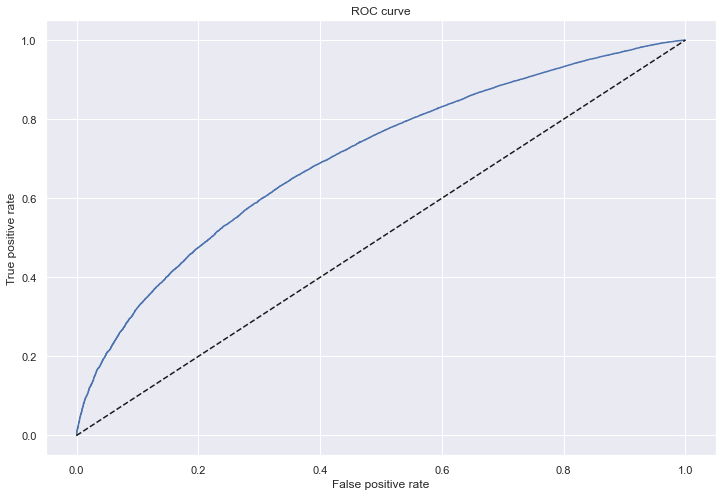

In [55]:
plt.figure(figsize =(12,8))
plt.plot(fpr, tpr)
plt.plot(fpr, fpr, linestyle = '--', color = 'k')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.show()

In [56]:
AUROC = roc_auc_score(df_actual_predict_probs['loan_data_targets_test'], df_actual_predict_probs['y_hat_test_proba'])
AUROC

0.7020521423564904

## Gini & Kolmogorov-Smirnov

In [57]:
df_actual_predict_probs = df_actual_predict_probs.sort_values('y_hat_test_proba')

In [58]:
df_actual_predict_probs.head()

,loan_data_targets_test,y_hat_test_proba,y_hat_test
42341,1,0.374368,0
39810,0,0.384524,0
42344,1,0.405989,0
40518,0,0.438655,0
40173,0,0.452770,0


In [59]:
df_actual_predict_probs.tail()

,loan_data_targets_test,y_hat_test_proba,y_hat_test
247054,1,0.991282,1
231463,1,0.991335,1
239228,1,0.991744,1
261086,1,0.992144,1
242624,1,0.992735,1


In [60]:
df_actual_predict_probs = df_actual_predict_probs.reset_index()

In [61]:
df_actual_predict_probs.head()

,index,loan_data_targets_test,y_hat_test_proba,y_hat_test
0,42341,1,0.374368,0
1,39810,0,0.384524,0
2,42344,1,0.405989,0
3,40518,0,0.438655,0
4,40173,0,0.452770,0


In [62]:
df_actual_predict_probs['cumulative N population'] = df_actual_predict_probs.index + 1
df_actual_predict_probs['cumulative N good'] = df_actual_predict_probs['loan_data_targets_test'].cumsum()
df_actual_predict_probs['cumulative N bad'] = df_actual_predict_probs['cumulative N population'] - df_actual_predict_probs['loan_data_targets_test'].cumsum()

In [63]:
df_actual_predict_probs.head()

,index,loan_data_targets_test,y_hat_test_proba,y_hat_test,cumulative N population,cumulative N good,cumulative N bad
0,42341,1,0.374368,0,1,1,0
1,39810,0,0.384524,0,2,1,1
2,42344,1,0.405989,0,3,2,1
3,40518,0,0.438655,0,4,2,2
4,40173,0,0.452770,0,5,2,3


In [64]:
df_actual_predict_probs['cumulative percent population'] = df_actual_predict_probs['cumulative N population'] / (df_actual_predict_probs.shape[0])
df_actual_predict_probs['cumulative percent good'] = df_actual_predict_probs['cumulative N good'] / df_actual_predict_probs['loan_data_targets_test'].sum()
df_actual_predict_probs['cumulative percent bad'] = df_actual_predict_probs['cumulative N bad'] / (df_actual_predict_probs.shape[0] - df_actual_predict_probs['loan_data_targets_test'].sum())

In [65]:
df_actual_predict_probs.head()

,index,loan_data_targets_test,y_hat_test_proba,y_hat_test,cumulative N population,cumulative N good,cumulative N bad,cumulative percent population,cumulative percent good,cumulative percent bad
0,42341,1,0.374368,0,1,1,0,0.000011,0.000012,0.000000
1,39810,0,0.384524,0,2,1,1,0.000021,0.000012,0.000098
2,42344,1,0.405989,0,3,2,1,0.000032,0.000024,0.000098
3,40518,0,0.438655,0,4,2,2,0.000043,0.000024,0.000196
4,40173,0,0.452770,0,5,2,3,0.000054,0.000024,0.000294


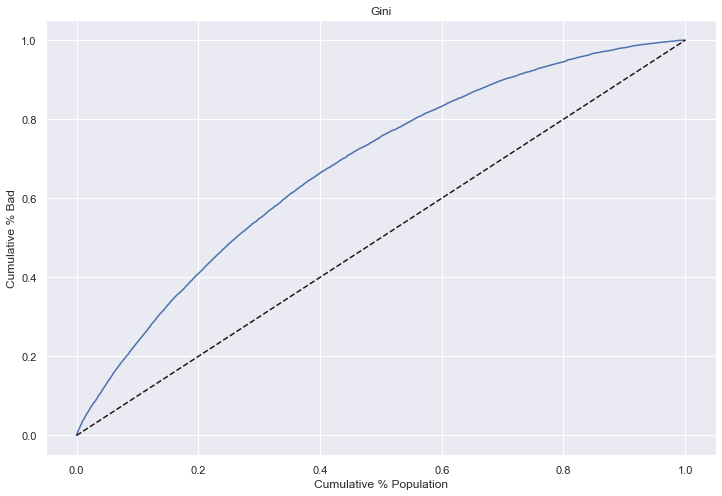

In [66]:
plt.figure(figsize = (12,8))
plt.plot(df_actual_predict_probs['cumulative percent population'], df_actual_predict_probs['cumulative percent bad'])
plt.plot(df_actual_predict_probs['cumulative percent population'], df_actual_predict_probs['cumulative percent population'], linestyle = '--', color = 'k')
plt.xlabel('Cumulative % Population')
plt.ylabel('Cumulative % Bad')
plt.title('Gini')
plt.show()

In [67]:
gini = AUROC * 2-1
gini

0.40410428471298077

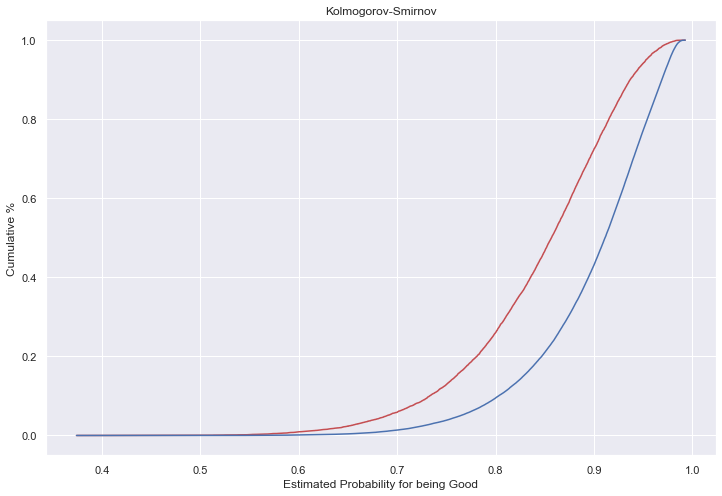

In [68]:
plt.figure(figsize = (12,8))
plt.plot(df_actual_predict_probs['y_hat_test_proba'], df_actual_predict_probs['cumulative percent bad'], color = 'r')
plt.plot(df_actual_predict_probs['y_hat_test_proba'], df_actual_predict_probs['cumulative percent good'], color = 'b')
plt.xlabel('Estimated Probability for being Good')
plt.ylabel('Cumulative %')
plt.title('Kolmogorov-Smirnov')
plt.show()

In [69]:
ks = max(df_actual_predict_probs['cumulative percent bad'] - df_actual_predict_probs['cumulative percent good'])
ks

0.2968324255980603

---

## Creating a Scorecard

In [70]:
summary_table

,Feature name,Coefficients,p_values
0,Intercept,-1.749499,NaN
1,grade:A,1.139054,4.285242e-36
2,grade:B,0.894125,1.643613e-48
3,grade:C,0.697976,6.810083e-35
4,grade:D,0.508606,3.185333e-21
5,grade:E,0.330656,6.176237e-12
6,grade:F,0.141008,4.923625e-03
7,home_ownership:OWN,0.094588,2.702421e-06
8,home_ownership:MORTGAGE,0.108024,1.446099e-17
9,addr_state:NM_VA,0.037653,2.402459e-01


In [71]:
ref_categories

['grade:G',
 'home_ownership:RENT_OTHER_NONE_ANY',
 'addr_state:ND_NE_IA_NV_FL_HI_AL',
 'verification_status:Verified',
 'purpose:educ__sm_b__wedd__ren_en__mov__house',
 'initial_list_status:f',
 'term:60',
 'emp_length:0',
 'mths_since_issue_d:>84',
 'int_rate:>20.281',
 'mths_since_earliest_cr_line:<140',
 'inq_last_6mths:>6',
 'open_acc:0',
 'acc_now_delinq:0',
 'annual_inc:<20K',
 'dti:>35',
 'mths_since_last_delinq:0-3',
 'mths_since_last_record:0-2']

In [72]:
df_ref_categories = pd.DataFrame(ref_categories, columns = ['Feature name'])
df_ref_categories['Coefficients'] = 0
df_ref_categories['p_values'] = np.nan
df_ref_categories

,Feature name,Coefficients,p_values
0,grade:G,0,NaN
1,home_ownership:RENT_OTHER_NONE_ANY,0,NaN
2,addr_state:ND_NE_IA_NV_FL_HI_AL,0,NaN
3,verification_status:Verified,0,NaN
4,purpose:educ__sm_b__wedd__ren_en__mov__house,0,NaN
5,initial_list_status:f,0,NaN
6,term:60,0,NaN
7,emp_length:0,0,NaN
8,mths_since_issue_d:>84,0,NaN
9,int_rate:>20.281,0,NaN


In [73]:
df_scorecard = pd.concat([summary_table, df_ref_categories])
df_scorecard = df_scorecard.reset_index()
df_scorecard

,index,Feature name,Coefficients,p_values
0,0,Intercept,-1.749499,NaN
1,1,grade:A,1.139054,4.285242e-36
2,2,grade:B,0.894125,1.643613e-48
3,3,grade:C,0.697976,6.810083e-35
4,4,grade:D,0.508606,3.185333e-21
5,5,grade:E,0.330656,6.176237e-12
6,6,grade:F,0.141008,4.923625e-03
7,7,home_ownership:OWN,0.094588,2.702421e-06
8,8,home_ownership:MORTGAGE,0.108024,1.446099e-17
9,9,addr_state:NM_VA,0.037653,2.402459e-01


In [74]:
df_scorecard['Original feature name'] = df_scorecard['Feature name'].str.split(':').str[0]

In [75]:
df_scorecard

,index,Feature name,Coefficients,p_values,Original feature name
0,0,Intercept,-1.749499,NaN,Intercept
1,1,grade:A,1.139054,4.285242e-36,grade
2,2,grade:B,0.894125,1.643613e-48,grade
3,3,grade:C,0.697976,6.810083e-35,grade
4,4,grade:D,0.508606,3.185333e-21,grade
5,5,grade:E,0.330656,6.176237e-12,grade
6,6,grade:F,0.141008,4.923625e-03,grade
7,7,home_ownership:OWN,0.094588,2.702421e-06,home_ownership
8,8,home_ownership:MORTGAGE,0.108024,1.446099e-17,home_ownership
9,9,addr_state:NM_VA,0.037653,2.402459e-01,addr_state


In [76]:
min_score = 300
max_score = 850

In [77]:
df_scorecard.groupby('Original feature name')['Coefficients'].min()

Original feature name
Intercept                     -1.749499
acc_now_delinq                 0.000000
addr_state                     0.000000
annual_inc                    -0.067714
dti                            0.000000
emp_length                     0.000000
grade                          0.000000
home_ownership                 0.000000
initial_list_status            0.000000
inq_last_6mths                 0.000000
int_rate                       0.000000
mths_since_earliest_cr_line    0.000000
mths_since_issue_d            -0.067574
mths_since_last_delinq         0.000000
mths_since_last_record         0.000000
open_acc                       0.000000
purpose                        0.000000
term                           0.000000
verification_status           -0.011472
Name: Coefficients, dtype: float64

In [78]:
min_sum_coef = df_scorecard.groupby('Original feature name')['Coefficients'].min().sum()
min_sum_coef

-1.896259525950966

In [79]:
df_scorecard.groupby('Original feature name')['Coefficients'].max()

Original feature name
Intercept                     -1.749499
acc_now_delinq                 0.230930
addr_state                     0.523938
annual_inc                     0.586369
dti                            0.364855
emp_length                     0.126281
grade                          1.139054
home_ownership                 0.108024
initial_list_status            0.054420
inq_last_6mths                 0.702233
int_rate                       0.879906
mths_since_earliest_cr_line    0.131380
mths_since_issue_d             1.089032
mths_since_last_delinq         0.219951
mths_since_last_record         0.401427
open_acc                       0.475900
purpose                        0.303791
term                           0.078203
verification_status            0.085161
Name: Coefficients, dtype: float64

In [80]:
max_sum_coef = df_scorecard.groupby('Original feature name')['Coefficients'].max().sum()
max_sum_coef

5.75135542782519

In [81]:
df_scorecard['Score - Calculation'] = df_scorecard['Coefficients'] * (max_score - min_score) / (max_sum_coef - min_sum_coef)
df_scorecard

,index,Feature name,Coefficients,p_values,Original feature name,Score - Calculation
0,0,Intercept,-1.749499,NaN,Intercept,-125.820180
1,1,grade:A,1.139054,4.285242e-36,grade,81.918281
2,2,grade:B,0.894125,1.643613e-48,grade,64.303561
3,3,grade:C,0.697976,6.810083e-35,grade,50.196904
4,4,grade:D,0.508606,3.185333e-21,grade,36.577859
5,5,grade:E,0.330656,6.176237e-12,grade,23.780091
6,6,grade:F,0.141008,4.923625e-03,grade,10.140986
7,7,home_ownership:OWN,0.094588,2.702421e-06,home_ownership,6.802563
8,8,home_ownership:MORTGAGE,0.108024,1.446099e-17,home_ownership,7.768842
9,9,addr_state:NM_VA,0.037653,2.402459e-01,addr_state,2.707902


In [82]:
df_scorecard['Score - Calculation'][0] = ((df_scorecard['Coefficients'][0] - min_sum_coef) / (max_sum_coef - min_sum_coef)) * (max_score - min_score) + min_score
df_scorecard

C:\Users\user\AppData\Local\Temp\ipykernel_14232\1263832758.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_scorecard['Score - Calculation'][0] = ((df_scorecard['Coefficients'][0] - min_sum_coef) / (max_sum_coef - min_sum_coef)) * (max_score - min_score) + min_score


,index,Feature name,Coefficients,p_values,Original feature name,Score - Calculation
0,0,Intercept,-1.749499,NaN,Intercept,310.554722
1,1,grade:A,1.139054,4.285242e-36,grade,81.918281
2,2,grade:B,0.894125,1.643613e-48,grade,64.303561
3,3,grade:C,0.697976,6.810083e-35,grade,50.196904
4,4,grade:D,0.508606,3.185333e-21,grade,36.577859
5,5,grade:E,0.330656,6.176237e-12,grade,23.780091
6,6,grade:F,0.141008,4.923625e-03,grade,10.140986
7,7,home_ownership:OWN,0.094588,2.702421e-06,home_ownership,6.802563
8,8,home_ownership:MORTGAGE,0.108024,1.446099e-17,home_ownership,7.768842
9,9,addr_state:NM_VA,0.037653,2.402459e-01,addr_state,2.707902


In [83]:
df_scorecard['Score - Preliminary'] = df_scorecard['Score - Calculation'].round()
df_scorecard

,index,Feature name,Coefficients,p_values,Original feature name,Score - Calculation,Score - Preliminary
0,0,Intercept,-1.749499,NaN,Intercept,310.554722,311.0
1,1,grade:A,1.139054,4.285242e-36,grade,81.918281,82.0
2,2,grade:B,0.894125,1.643613e-48,grade,64.303561,64.0
3,3,grade:C,0.697976,6.810083e-35,grade,50.196904,50.0
4,4,grade:D,0.508606,3.185333e-21,grade,36.577859,37.0
5,5,grade:E,0.330656,6.176237e-12,grade,23.780091,24.0
6,6,grade:F,0.141008,4.923625e-03,grade,10.140986,10.0
7,7,home_ownership:OWN,0.094588,2.702421e-06,home_ownership,6.802563,7.0
8,8,home_ownership:MORTGAGE,0.108024,1.446099e-17,home_ownership,7.768842,8.0
9,9,addr_state:NM_VA,0.037653,2.402459e-01,addr_state,2.707902,3.0


In [84]:
min_sum_score_prel = df_scorecard.groupby('Original feature name')['Score - Preliminary'].min().sum()
min_sum_score_prel

300.0

In [85]:
max_sum_score_prel = df_scorecard.groupby('Original feature name')['Score - Preliminary'].max().sum()
max_sum_score_prel

851.0

In [86]:
df_scorecard['Difference'] = df_scorecard['Score - Preliminary'] - df_scorecard['Score - Calculation']
df_scorecard

,index,Feature name,Coefficients,p_values,Original feature name,Score - Calculation,Score - Preliminary,Difference
0,0,Intercept,-1.749499,NaN,Intercept,310.554722,311.0,0.445278
1,1,grade:A,1.139054,4.285242e-36,grade,81.918281,82.0,0.081719
2,2,grade:B,0.894125,1.643613e-48,grade,64.303561,64.0,-0.303561
3,3,grade:C,0.697976,6.810083e-35,grade,50.196904,50.0,-0.196904
4,4,grade:D,0.508606,3.185333e-21,grade,36.577859,37.0,0.422141
5,5,grade:E,0.330656,6.176237e-12,grade,23.780091,24.0,0.219909
6,6,grade:F,0.141008,4.923625e-03,grade,10.140986,10.0,-0.140986
7,7,home_ownership:OWN,0.094588,2.702421e-06,home_ownership,6.802563,7.0,0.197437
8,8,home_ownership:MORTGAGE,0.108024,1.446099e-17,home_ownership,7.768842,8.0,0.231158
9,9,addr_state:NM_VA,0.037653,2.402459e-01,addr_state,2.707902,3.0,0.292098


In [87]:
df_scorecard['Difference'].idxmax()

51

In [88]:
df_scorecard['Score - Final'] = df_scorecard['Score - Preliminary']
df_scorecard['Score - Final'][51] = 50
df_scorecard

C:\Users\user\AppData\Local\Temp\ipykernel_14232\3930902699.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_scorecard['Score - Final'][51] = 50


,index,Feature name,Coefficients,p_values,Original feature name,Score - Calculation,Score - Preliminary,Difference,Score - Final
0,0,Intercept,-1.749499,NaN,Intercept,310.554722,311.0,0.445278,311.0
1,1,grade:A,1.139054,4.285242e-36,grade,81.918281,82.0,0.081719,82.0
2,2,grade:B,0.894125,1.643613e-48,grade,64.303561,64.0,-0.303561,64.0
3,3,grade:C,0.697976,6.810083e-35,grade,50.196904,50.0,-0.196904,50.0
4,4,grade:D,0.508606,3.185333e-21,grade,36.577859,37.0,0.422141,37.0
5,5,grade:E,0.330656,6.176237e-12,grade,23.780091,24.0,0.219909,24.0
6,6,grade:F,0.141008,4.923625e-03,grade,10.140986,10.0,-0.140986,10.0
7,7,home_ownership:OWN,0.094588,2.702421e-06,home_ownership,6.802563,7.0,0.197437,7.0
8,8,home_ownership:MORTGAGE,0.108024,1.446099e-17,home_ownership,7.768842,8.0,0.231158,8.0
9,9,addr_state:NM_VA,0.037653,2.402459e-01,addr_state,2.707902,3.0,0.292098,3.0


In [89]:
min_sum_score_prel = df_scorecard.groupby('Original feature name')['Score - Final'].min().sum()
min_sum_score_prel

300.0

In [90]:
max_sum_score_prel = df_scorecard.groupby('Original feature name')['Score - Final'].max().sum()
max_sum_score_prel

850.0

## Calculating Credit Score

In [91]:
inputs_test_with_ref_cat.head()

,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,grade:G,home_ownership:RENT_OTHER_NONE_ANY,home_ownership:OWN,home_ownership:MORTGAGE,...,mths_since_last_delinq:4-30,mths_since_last_delinq:31-56,mths_since_last_delinq:>=57,mths_since_last_record:Missing,mths_since_last_record:0-2,mths_since_last_record:3-20,mths_since_last_record:21-31,mths_since_last_record:32-80,mths_since_last_record:81-86,mths_since_last_record:>=86
362514,0,0,1,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
288564,0,0,0,0,1,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
213591,0,0,1,0,0,0,0,0,0,1,...,0,1,0,1,0,0,0,0,0,0
263083,0,0,1,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
165001,1,0,0,0,0,0,0,0,0,1,...,0,1,0,1,0,0,0,0,0,0


In [92]:
df_scorecard

,index,Feature name,Coefficients,p_values,Original feature name,Score - Calculation,Score - Preliminary,Difference,Score - Final
0,0,Intercept,-1.749499,NaN,Intercept,310.554722,311.0,0.445278,311.0
1,1,grade:A,1.139054,4.285242e-36,grade,81.918281,82.0,0.081719,82.0
2,2,grade:B,0.894125,1.643613e-48,grade,64.303561,64.0,-0.303561,64.0
3,3,grade:C,0.697976,6.810083e-35,grade,50.196904,50.0,-0.196904,50.0
4,4,grade:D,0.508606,3.185333e-21,grade,36.577859,37.0,0.422141,37.0
5,5,grade:E,0.330656,6.176237e-12,grade,23.780091,24.0,0.219909,24.0
6,6,grade:F,0.141008,4.923625e-03,grade,10.140986,10.0,-0.140986,10.0
7,7,home_ownership:OWN,0.094588,2.702421e-06,home_ownership,6.802563,7.0,0.197437,7.0
8,8,home_ownership:MORTGAGE,0.108024,1.446099e-17,home_ownership,7.768842,8.0,0.231158,8.0
9,9,addr_state:NM_VA,0.037653,2.402459e-01,addr_state,2.707902,3.0,0.292098,3.0


In [93]:
inputs_test_with_ref_cat_w_intercept = inputs_test_with_ref_cat

In [94]:
inputs_test_with_ref_cat_w_intercept.insert(0, 'Intercept', 1)

In [95]:
inputs_test_with_ref_cat_w_intercept.head()

,Intercept,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,grade:G,home_ownership:RENT_OTHER_NONE_ANY,home_ownership:OWN,...,mths_since_last_delinq:4-30,mths_since_last_delinq:31-56,mths_since_last_delinq:>=57,mths_since_last_record:Missing,mths_since_last_record:0-2,mths_since_last_record:3-20,mths_since_last_record:21-31,mths_since_last_record:32-80,mths_since_last_record:81-86,mths_since_last_record:>=86
362514,1,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
288564,1,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
213591,1,0,0,1,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,0
263083,1,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
165001,1,1,0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,0


In [96]:
inputs_test_with_ref_cat_w_intercept = inputs_test_with_ref_cat_w_intercept[df_scorecard['Feature name'].values]

In [97]:
inputs_test_with_ref_cat_w_intercept.head()

,Intercept,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,home_ownership:OWN,home_ownership:MORTGAGE,addr_state:NM_VA,...,mths_since_issue_d:>84,int_rate:>20.281,mths_since_earliest_cr_line:<140,inq_last_6mths:>6,open_acc:0,acc_now_delinq:0,annual_inc:<20K,dti:>35,mths_since_last_delinq:0-3,mths_since_last_record:0-2
362514,1,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
288564,1,0,0,0,0,1,0,0,1,0,...,0,1,0,0,0,1,0,0,1,0
213591,1,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
263083,1,0,0,1,0,0,0,0,1,0,...,0,0,1,0,0,1,0,0,0,0
165001,1,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0


In [98]:
scorecard_scores = df_scorecard['Score - Final']

In [99]:
inputs_test_with_ref_cat_w_intercept.shape

(93257, 110)

In [100]:
scorecard_scores.shape

(110,)

In [101]:
scorecard_scores = scorecard_scores.values.reshape(110,1)

In [102]:
scorecard_scores.shape

(110, 1)

In [103]:
y_scores = inputs_test_with_ref_cat_w_intercept.dot(scorecard_scores)

In [104]:
y_scores.head()

,0
362514,617.0
288564,558.0
213591,585.0
263083,635.0
165001,684.0


## Credit Score to PD

In [105]:
sum_coef_from_score = ((y_scores - min_score) / (max_score - min_score)) * (max_sum_coef - min_sum_coef) + min_sum_coef

In [106]:
y_hat_test_proba_from_score = np.exp(sum_coef_from_score) / (np.exp(sum_coef_from_score) + 1)
y_hat_test_proba_from_score.head()

,0
362514,0.924947
288564,0.844378
213591,0.887614
263083,0.940578
165001,0.969027


In [107]:
y_hat_test_proba[0:5]

array([0.92449516, 0.84177756, 0.88693012, 0.94128864, 0.96905326])

## Setting cut-offs

In [108]:
tr = 0.9
df_actual_predict_probs['y_hat_test'] = np.where(df_actual_predict_probs['y_hat_test_proba'] > tr, 1, 0)

In [109]:
pd.crosstab(df_actual_predict_probs['loan_data_targets_test'], df_actual_predict_probs['y_hat_test'], rownames = ['Actual'], colnames = ['Predicted'])

Predicted,0,1
Actual,,
0,7381,2809
1,35796,47271


In [110]:
pd.crosstab(df_actual_predict_probs['loan_data_targets_test'], df_actual_predict_probs['y_hat_test'], rownames = ['Actual'], colnames = ['Predicted']) / df_actual_predict_probs.shape[0]

Predicted,0,1
Actual,,
0,0.079147,0.030121
1,0.383842,0.506890


In [111]:
(pd.crosstab(df_actual_predict_probs['loan_data_targets_test'], df_actual_predict_probs['y_hat_test'], rownames = ['Actual'], colnames = ['Predicted']) / df_actual_predict_probs.shape[0]).iloc[0, 0] + (pd.crosstab(df_actual_predict_probs['loan_data_targets_test'], df_actual_predict_probs['y_hat_test'], rownames = ['Actual'], colnames = ['Predicted']) / df_actual_predict_probs.shape[0]).iloc[1, 1]

0.5860364369430713

In [112]:
roc_curve(df_actual_predict_probs['loan_data_targets_test'], df_actual_predict_probs['y_hat_test_proba'])

(array([0.        , 0.        , 0.        , ..., 0.99990186, 1.        ,
        1.        ]),
 array([0.00000000e+00, 1.20384750e-05, 1.20384750e-04, ...,
        9.99987962e-01, 9.99987962e-01, 1.00000000e+00]),
 array([1.99273507, 0.99273507, 0.9907657 , ..., 0.40598863, 0.38452405,
        0.37436765]))

In [113]:
fpr, tpr, thresholds = roc_curve(df_actual_predict_probs['loan_data_targets_test'], df_actual_predict_probs['y_hat_test_proba'])

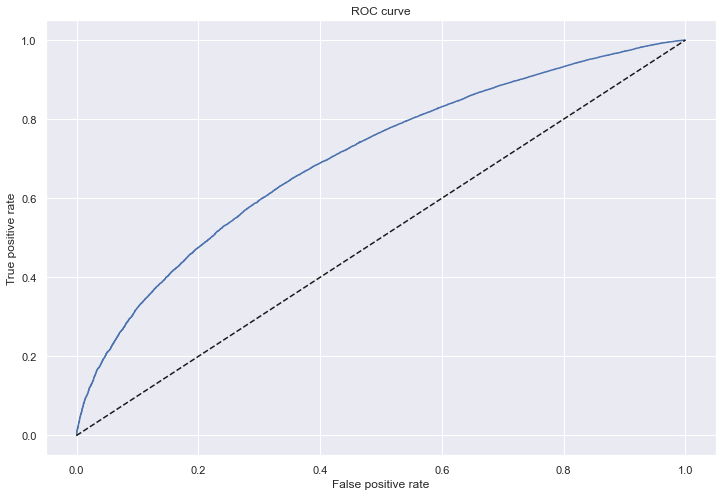

In [114]:
plt.figure(figsize = (12,8))
plt.plot(fpr, tpr)
plt.plot(fpr, fpr, linestyle = '--', color = 'k')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.show()

In [115]:
thresholds

array([1.99273507, 0.99273507, 0.9907657 , ..., 0.40598863, 0.38452405,
       0.37436765])

In [116]:
thresholds.shape

(17104,)

In [117]:
df_cutoffs = pd.concat([pd.DataFrame(thresholds), pd.DataFrame(fpr), pd.DataFrame(tpr)], axis = 1)

In [118]:
df_cutoffs.columns = ['thresholds', 'fpr', 'tpr']

In [119]:
df_cutoffs.head()

,thresholds,fpr,tpr
0,1.992735,0.000000,0.000000
1,0.992735,0.000000,0.000012
2,0.990766,0.000000,0.000120
3,0.990749,0.000098,0.000120
4,0.989543,0.000098,0.000566


In [120]:
df_cutoffs['thresholds'][0] = 1 - 1 / np.power(10, 16)

In [121]:
df_cutoffs['Score'] = ((np.log(df_cutoffs['thresholds'] / (1 - df_cutoffs['thresholds'])) - min_sum_coef) * ((max_score - min_score) / (max_sum_coef - min_sum_coef)) + min_score).round()

In [122]:
df_cutoffs.head()

,thresholds,fpr,tpr,Score
0,1.000000,0.000000,0.000000,1972.0
1,0.992735,0.000000,0.000012,790.0
2,0.990766,0.000000,0.000120,773.0
3,0.990749,0.000098,0.000120,772.0
4,0.989543,0.000098,0.000566,764.0


In [123]:
df_cutoffs['Score'][0] = max_score

In [124]:
df_cutoffs.head()

,thresholds,fpr,tpr,Score
0,1.000000,0.000000,0.000000,850.0
1,0.992735,0.000000,0.000012,790.0
2,0.990766,0.000000,0.000120,773.0
3,0.990749,0.000098,0.000120,772.0
4,0.989543,0.000098,0.000566,764.0


In [125]:
df_cutoffs.tail()

,thresholds,fpr,tpr,Score
17099,0.483006,0.999509,0.999976,431.0
17100,0.438655,0.999902,0.999976,419.0
17101,0.405989,0.999902,0.999988,409.0
17102,0.384524,1.000000,0.999988,403.0
17103,0.374368,1.000000,1.000000,399.0


In [126]:
def n_approved(p):
    return np.where(df_actual_predict_probs['y_hat_test_proba'] >= p, 1, 0).sum()

In [127]:
df_cutoffs['N Approved'] = df_cutoffs['thresholds'].apply(n_approved)
df_cutoffs['N Rejected'] = df_actual_predict_probs['y_hat_test_proba'].shape[0] - df_cutoffs['N Approved']
df_cutoffs['Approval Rate'] = df_cutoffs['N Approved'] / df_actual_predict_probs['y_hat_test_proba'].shape[0]
df_cutoffs['Rejection Rate'] = 1 - df_cutoffs['Approval Rate']

In [128]:
df_cutoffs.head()

,thresholds,fpr,tpr,Score,N Approved,N Rejected,Approval Rate,Rejection Rate
0,1.000000,0.000000,0.000000,850.0,0,93257,0.000000,1.000000
1,0.992735,0.000000,0.000012,790.0,1,93256,0.000011,0.999989
2,0.990766,0.000000,0.000120,773.0,10,93247,0.000107,0.999893
3,0.990749,0.000098,0.000120,772.0,11,93246,0.000118,0.999882
4,0.989543,0.000098,0.000566,764.0,48,93209,0.000515,0.999485


In [129]:
df_cutoffs.tail()

,thresholds,fpr,tpr,Score,N Approved,N Rejected,Approval Rate,Rejection Rate
17099,0.483006,0.999509,0.999976,431.0,93250,7,0.999925,0.000075
17100,0.438655,0.999902,0.999976,419.0,93254,3,0.999968,0.000032
17101,0.405989,0.999902,0.999988,409.0,93255,2,0.999979,0.000021
17102,0.384524,1.000000,0.999988,403.0,93256,1,0.999989,0.000011
17103,0.374368,1.000000,1.000000,399.0,93257,0,1.000000,0.000000


In [130]:
df_cutoffs.iloc[5000: 6200, ]

,thresholds,fpr,tpr,Score,N Approved,N Rejected,Approval Rate,Rejection Rate
5000,0.902111,0.266830,0.556105,596.0,48913,44344,0.524497,0.475503
5001,0.902049,0.266830,0.556503,596.0,48946,44311,0.524851,0.475149
5002,0.902041,0.266928,0.556503,596.0,48947,44310,0.524861,0.475139
5003,0.902040,0.266928,0.556515,596.0,48948,44309,0.524872,0.475128
5004,0.902039,0.267026,0.556515,596.0,48949,44308,0.524883,0.475117
5005,0.902027,0.267026,0.556623,596.0,48958,44299,0.524979,0.475021
5006,0.902019,0.267223,0.556623,596.0,48960,44297,0.525001,0.474999
5007,0.902009,0.267223,0.556779,596.0,48973,44284,0.525140,0.474860
5008,0.902007,0.267321,0.556779,596.0,48974,44283,0.525151,0.474849
5009,0.901976,0.267321,0.556972,596.0,48990,44267,0.525322,0.474678


In [131]:
df_cutoffs.iloc[1000: 2000, ]

,thresholds,fpr,tpr,Score,N Approved,N Rejected,Approval Rate,Rejection Rate
1000,0.952547,0.051030,0.211239,652.0,18067,75190,0.193733,0.806267
1001,0.952544,0.051030,0.211275,652.0,18070,75187,0.193766,0.806234
1002,0.952542,0.051129,0.211275,652.0,18071,75186,0.193776,0.806224
1003,0.952541,0.051129,0.211299,652.0,18073,75184,0.193798,0.806202
1004,0.952540,0.051227,0.211299,652.0,18074,75183,0.193809,0.806191
1005,0.952484,0.051227,0.211660,652.0,18104,75153,0.194130,0.805870
1006,0.952483,0.051325,0.211660,652.0,18105,75152,0.194141,0.805859
1007,0.952475,0.051325,0.211709,652.0,18109,75148,0.194184,0.805816
1008,0.952469,0.051423,0.211709,652.0,18110,75147,0.194195,0.805805
1009,0.952458,0.051423,0.211817,652.0,18119,75138,0.194291,0.805709


In [132]:
inputs_train_with_ref_cat.to_csv('inputs_train_with_ref_cat.csv')

In [133]:
df_scorecard.to_csv('df_scorecard.csv')

In [134]:
import pickle

In [136]:
pickle.dump(reg, open('reg_pd.sav', 'wb'))